# Simple Bayes Estimation   
Simulated data is Bernoulli distribution like coin toss, with `p=0.3`.  
From uniform distribution, result is simulated (`coin_toss_result = 1 or 0`).  
Here, we say **likelifood is modeled to Bernoulli**.   
Then, conjugate prior (of $\mu$) can be modeled in Beta distribution.  


In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import beta 
%matplotlib inline

plt.style.use('ggplot') # one of my favorits

In [18]:
def plot(a,b,trial,ctr):
    plt.figure()
    x = np.linspace(0,1,200)
    y = beta.pdf(x,a,b) # Beta PDF with (a,b)
    mean = float(a) / (a+b) # Theoretical mean of beta(X;a,b)
    plt.plot(x,y)
    plt.title("Distribution after %s trials, true rate = %.1f, mean=%.2f" % (trial,ctr,mean))
#    plt.grid

With Likelihood=Bernoulli(p) & Prior=Beta(a,b), Posterior = $Beta(a+\sum_{i=1}^nx_i, b+n-\sum_{i=1}^nx_i)$.  
Therefore, everytime `coin_toss_result==True`, increment `a`, and increment `b` otherwise.   

See [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior).   
The first row of the table **Discrete distributions** shows this relationship.  

final (a,b) = (461,1042)


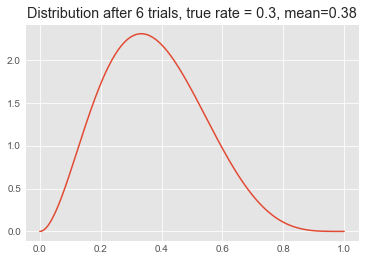

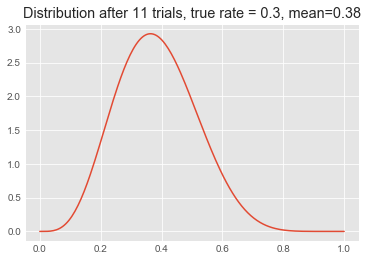

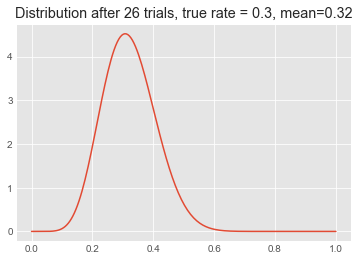

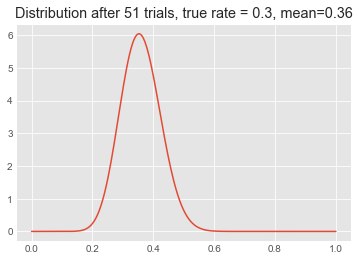

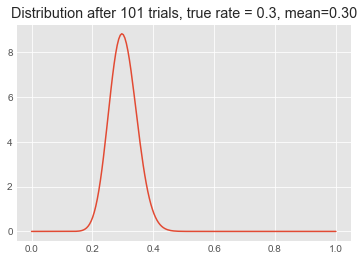

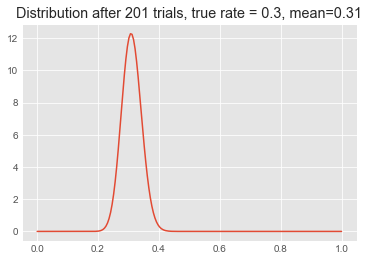

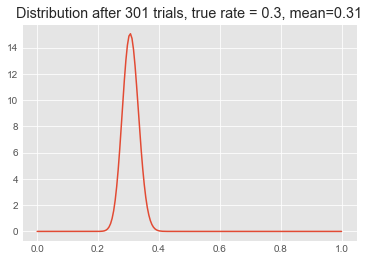

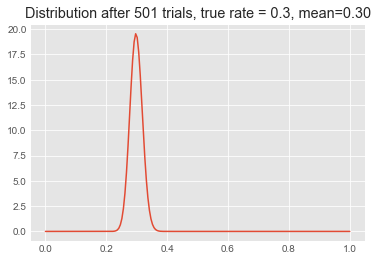

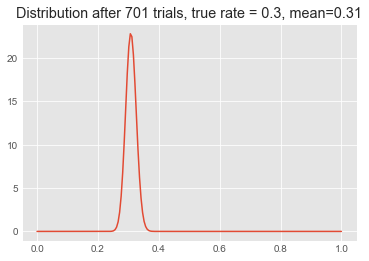

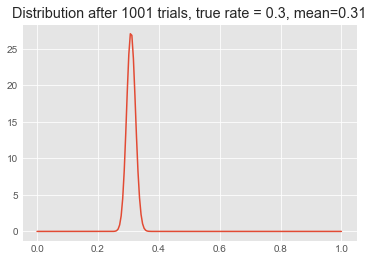

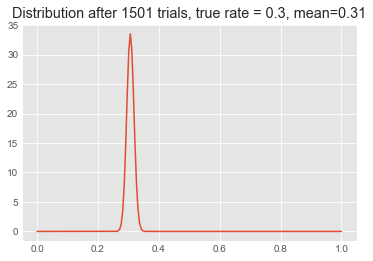

In [23]:
true_ctr = 0.3 # true center(mean) of Bernoulli distribution parameter "p". 
a,b = 1,1      # beta parameter initial value 
show = [5, 10, 25, 50, 100, 200, 300, 500, 700, 1000, 1500]
for t in range(1501):
    coin_toss_result = (np.random.random() < true_ctr) # true or false 
    if coin_toss_result: 
        a += 1  # See description above 
    else:
        b += 1  # See description above
    
    if t in show: 
        plot(a, b, t+1, true_ctr)
        
print("final (a,b) = (%d,%d)" % (a,b))